<img src="https://raw.githubusercontent.com/eduardoseity/tcc-facens-2024/main/images/logo-facens.webp" width=200>

# Trabalho de conclusão de curso
## Centro Universitário Facens

### Curso: Especialização em Ciência de Dados

<a name="apresentacao"></a>
## Apresentação


>A cidade de Chicago, localizada no estado de Illinois, nos Estados Unidos da América, tem sido um ponto focal em discussões sobre crimes e segurança pública. Segundo a plataforma americana NeighborhoodScout (LOCATION, 2024), a cidade, com uma taxa de crime de 40 a cada mil moradores, possui uma das taxas mais altas no país comparada com todas as outras comunidades, desde as menores até as maiores cidades.
Com uma população diversa e com uma paisagem urbana complexa, a cidade passa por desafios quando o assunto é prevenção de crimes. Nos anos mais recentes, a análise de dados se tornou uma ferramenta muito forte para alguns padrões de crime começarem a ser entendidos. Por esse meio, pesquisadores e autoridades podem estudar algumas causas, distribuições geográficas e tendências das atividades criminais para melhor entendimento.


><b>Alunos:</b><br>
Lucas Olian Gomes<br>
Maria Angélica Pires Yokota

><b>Professor orientador:</b><br>
Adriano Valério Santos da Silva

Conclusão: Fevereiro/2025

## Índice
- [Objetivo](#objetivo)
- [Bibliotecas](#bibliotecas)
- [Conjunto de Dados](#conjuntodedados)
- [Análise exploratória](#analiseexploratoria)
  - [Visão Geral do dataset](#visaogeral)
  - [Análise Exploratória Detalhada](#analiseexporatoriadetalhada)
- [Modelo](#modelo)
  - [Normalização e Aplicação de filtros](#normalizaçãoeaplicaçãodefiltros)
  - [Visualização da Nuvem de Palavras](#nuvemdepalavras)
  - [Vizualização do Gráfico de frequência](#graficodefrequencia)
  - [Aplicação do Smote e TF-IDF](#smotetfidf)  
  - [Treino & Teste](#treinoteste)  
  - [GaussianNB](#gaussiannb)
  - [AdaBoostClassifier](#adaboost)
  - [Random Forest](#randomforest)  
  - [Árvore de decisão (Decision Tree)](#arvorededecisao)
  - [Máquina de vetores de suporte (Support Vector Machine)](#svm)
  - [Rede Neural Artificial (Artificial Neural Network)](#redeneuralartificial)
  - [PyCaret](#pycaret)
- [Resultados](#resultados)
  - [Matriz de Confusão](#matrizconfusao)
  - [Grafico: Curva de aprendizado](#curvaaprendizado)


<a name="objetivo"></a>
## Objetivo


O estudo deste artigo trará como principal referência a base de dados oficial de Crimes em Chicago, encontrada no Chicago Data Portal e , utilizará técnicas de Processamento de Linguagem Natural (NLP) e análise exploratória para extrair informações relevantes a fim de gerar insights. O objetivo é ser capaz de prever, a partir da descrição de um crime, quais são as penalidades mais frequentemente aplicadas para as pessoas que cometeram tal criminalidade.
Essa abordagem inovadora oferece um potencial significativo para melhorar a compreensão dos fatores que influenciam as decisões judiciais em Chicago, possibilitando, assim, uma análise mais profunda sobre como as autoridades aplicam as punições, além de auxiliar no aprimoramento de estratégias de prevenção e intervenção.
.

<a name="bibliotecas"></a>
## Bibliotecas

In [ ]:
!pip install scikit-learn
!pip install pycaret
import numpy as np
import pandas as pd

# Date time
from datetime import datetime

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Filtros e Padronização
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Classificadores
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score, log_loss, classification_report, confusion_matrix, multilabel_confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from pycaret.classification import *

# Others
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<a name="conjuntodedados"></a>
## Conjunto de dados

O conjunto de dados escolhido para este projeto consiste em incidentes de crimes relatados na cidade de Chicago de 2018. Os dados são extraídos do sistema CLEAR (Citizen Law Enforcement Analysis and Reporting) do Departamento de Polícia de Chicago, https://data.cityofchicago.org/browse?category=Public%20Safety onde é possivel filtrar pelo ano desejado desde 2001 a 2019. Este é um dos mais ricos conjuntos de dados na área de crimes, fornecendo informações detalhadas sobre a data, tipo, descrição e localização dos crimes, entre outros detalhes relevantes para nossa análise.

Além disso, o conjunto de dados inclui informações sobre a hora do dia em que os crimes ocorreram, o distrito policial responsável pela área, o status do caso (se foi resolvido ou não) e a descrição das armas usadas, se aplicável. Essas informações adicionais permitem uma análise mais aprofundada dos padrões de criminalidade, ajudando a identificar tendências e áreas de alta incidência de crimes.

<a name="analiseexploratoria"></a>
## Análise exploratória
<br><small>[Voltar ao topo](#apresentacao)</small>



Upload do conjunto de dados, definindo caminho e nome.

In [ ]:
df_ChicagosCrime = pd.read_csv("/content/Chicago Crimes 2018.csv")

df = pd.read_csv('path/to/your/file.csv')


<a name="visaogeral"></a>
### Visão Geral do Dataset

Verificando as 10 primeiras linhas do conjunto de dados.

In [ ]:
df_ChicagosCrime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13158716,JG362691,11/09/2018 12:00:00 AM,017XX N NASHVILLE AVE,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,29.0,25,02,1132147.0,1910836.0,2018,09/14/2023 03:41:59 PM,41.911574,-87.789972,"(41.911574252, -87.789972279)"
1,12491515,JE384510,09/15/2018 08:00:00 AM,002XX W RANDOLPH ST,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,COMMERCIAL / BUSINESS OFFICE,True,False,...,42.0,32,12,NaN,NaN,2018,09/15/2023 03:41:25 PM,NaN,NaN,NaN
2,11465250,JB456922,09/30/2018 01:05:00 PM,109XX S VINCENNES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,19.0,75,04A,1167716.0,1832035.0,2018,09/16/2023 03:41:56 PM,41.694643,-87.661565,"(41.69464271, -87.661565167)"
3,13113476,JG308610,09/01/2018 12:00:00 AM,067XX S ROCKWELL ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,16.0,66,02,NaN,NaN,2018,09/16/2023 03:41:56 PM,NaN,NaN,NaN
4,13211826,JG424759,12/14/2018 02:45:00 PM,012XX W VAN BUREN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,34.0,28,11,NaN,NaN,2018,09/16/2023 03:42:58 PM,NaN,NaN,NaN


Significado das counas do conjunto de dados
* ID: Unique numeric ID.
* Case Number: Unique numeric/letter based ID.
* Date: Datestamp in MM/DD/YYYY, HH:MM:SS day and time format.
* Block: Block of crime with street number and street, only showing first 3 digits of street number for privacy. ex) 013XX S Sawyer Ave.
* IUCR: 4 digit crime reference number, non-unique.
* Primary_Type: Short crime description/categorization.
* Description: Longer explanation of crime (1–5 words typically).
* Location_Description: Short location description/categorization.
* Arrest: True or False.
* Domestic: True or False.
* Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area — each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.
* Distric: Distrito policial onde o incidente ocorreu.
* Ward: Divisão política da cidade onde o crime ocorreu.
* Community Area: Área comunitária onde o crime ocorre.
* FBI Code: Código usado pelo FBI para classificar o crime.
* X Coordinate: Coordenada X do local do crime.
* Y Coordinate: Coordenada Y do local do crime.
* Year: Ano em que o crime ocorreu.
* Updated On: Data em que o registro foi atualizado.
* Latitude: Latitude do local do crime.
* Longitude: Longitude do local do crime.
* Location: Localização completa do crime em formato de latitude e longitude.

<a name="analiseexporatoriadetalhada"></a>
### Analise Exploratoria Detalhada

Copiando o conjunto de dados para melhor trabalhar sem perder os dados originais.

In [ ]:
cc = df_ChicagosCrime.copy()

Retirando algumas colunas que não serão uteis.

In [ ]:
cc = cc.drop(
    ['Case Number',
     'Community Area',
     'X Coordinate',
     'Y Coordinate',
     'Year',
     'Updated On',
     'Latitude',
     'Longitude',
     'Location'
    ], axis = 'columns'
)

Adicionando uma coluna como uma frase mais detalhada

In [ ]:
cc['Text Combined'] = ' '.join(cc['Primary Type'].dropna().astype(str)) + ' ' + ' '.join(cc['Description'].dropna().astype(str))

Verificando algumas informações do cojunto de dados como: Nome da coluna, tipo de dados contidos e quantidade de linhas nulas e não nulas.

In [ ]:
print(cc.info())

# Checking for any empty value
print(cc.isna().any())

# Checking the sum of the empty value
print(cc.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269053 entries, 0 to 269052
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    269053 non-null  int64  
 1   Date                  269053 non-null  object 
 2   Block                 269053 non-null  object 
 3   IUCR                  269053 non-null  object 
 4   Primary Type          269053 non-null  object 
 5   Description           269053 non-null  object 
 6   Location Description  267932 non-null  object 
 7   Arrest                269053 non-null  bool   
 8   Domestic              269053 non-null  bool   
 9   Beat                  269053 non-null  int64  
 10  District              269053 non-null  int64  
 11  Ward                  269049 non-null  float64
 12  FBI Code              269053 non-null  object 
 13  Text Combined         269053 non-null  object 
dtypes: bool(2), float64(1), int64(3), object(8)
memory u

Substituindo valores nulos da coluna 'Location Description' por 'Desconhecido' e substituindo valores nulos na coluna ward pela moda.

In [ ]:
cc['Location Description'] = cc['Location Description'].fillna('Unknown')
cc['Ward'] = cc['Ward'].fillna(cc['Ward'].mode()[0])

Substituindo os True e False para valores 0 e 1 do 'target', Arrest.


In [ ]:
cc['Arrest'] = cc['Arrest'].replace({True: 1, False: 0})
cc['Domestic'] = cc['Domestic'].replace({True: 1, False: 0})

In [ ]:
#cc['Ward'] = cc['Ward'].astype(int)

<a name="modelo"></a>
## Modelo


<a name="normalizaçãoeaplicaçãodefiltros"></a>
### Normalização e Aplicação de filtros


Apicando filtro com StopWords.

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Lista de stopwords personalizada
stop_words = set(stopwords.words('english'))
stop_words.update(['500', 'to', 'and'])

# Função para limpeza completa do texto
def preprocess_text(text):
    text = text.lower()  # Minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]  # Remover stopwords personalizadas
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatização
    return ' '.join(words)

# Aplicando o pré-processamento ao DataFrame
cc_stopwords = cc[['Primary Type', 'Description']].copy()
cc_stopwords['with_stopwords'] = cc_stopwords['Primary Type'] + ' ' + cc_stopwords['Description']
cc_stopwords['with_stopwords'] = cc_stopwords['with_stopwords'].fillna('').apply(preprocess_text)

# Exibir DataFrame resultante
print(cc_stopwords)

# Remover pontuações adicionais (caso necessário)
cc_stopwords['with_stopwords'] = cc_stopwords['with_stopwords'].str.replace(r'\s+', ' ', regex=True)

                      Primary Type  \
0          CRIMINAL SEXUAL ASSAULT   
1               DECEPTIVE PRACTICE   
2                          ASSAULT   
3       OFFENSE INVOLVING CHILDREN   
4               DECEPTIVE PRACTICE   
...                            ...   
269048                 SEX OFFENSE   
269049  OFFENSE INVOLVING CHILDREN   
269050          DECEPTIVE PRACTICE   
269051          DECEPTIVE PRACTICE   
269052     CRIMINAL SEXUAL ASSAULT   

                                              Description  \
0                                      AGGRAVATED - OTHER   
1                                            EMBEZZLEMENT   
2                                    AGGRAVATED - HANDGUN   
3                SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER   
4                     FINANCIAL IDENTITY THEFT OVER $ 300   
...                                                   ...   
269048                              CRIMINAL SEXUAL ABUSE   
269049  AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M.

Juntando 'Description' e 'Primary Type' para uma descrição ou frase mais completa e detalhada utilizando o filtro de StopWords.

<a name="nuvemdepalavras"></a>
### Vizualização da Nuvem de Palavras

Criando o visual de nuvem de palavras do dataset original.

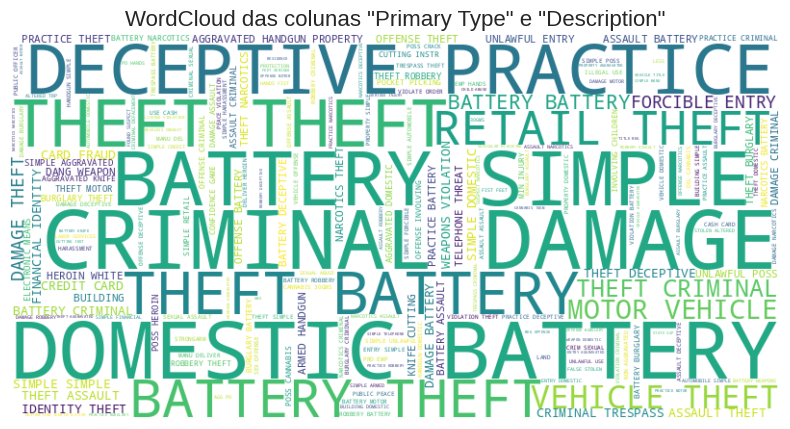

In [ ]:
Text_combined = ' '.join(cc['Primary Type'].dropna().astype(str)) + ' ' + ' '.join(cc['Description'].dropna().astype(str))

# Criando a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(Text_combined)

# Plotando a WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud das colunas "Primary Type" e "Description"', fontsize=16)
plt.show()

Criando o grafico com Stop Words

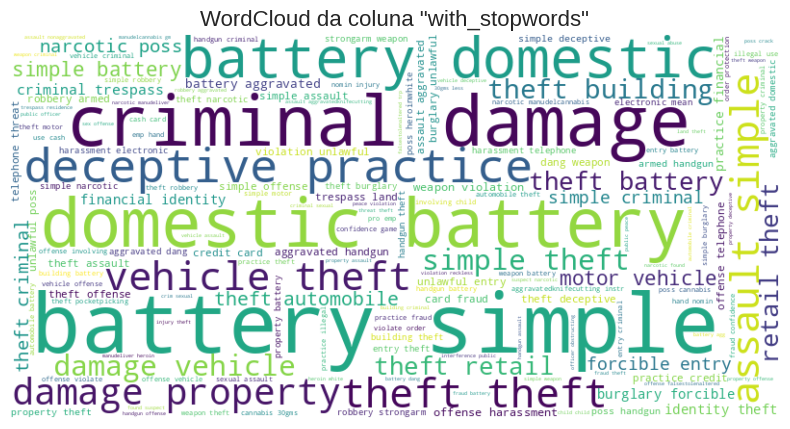

In [ ]:
combined_text = ' '.join(cc_stopwords['with_stopwords'].dropna().astype(str))

# Criar a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(combined_text)

# Plotar a WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud da coluna "with_stopwords"', fontsize=16)
plt.show()

<a name="graficodefrequencia"></a>
### Vizualização do Gráfico de frequência

Concatenando todas as palavras das colunas 'Primary Type' e 'Description',tokenizando o texto, calculando a frequência das palavras e convertendo para um DataFrame para melhor visualização.

In [ ]:
# Tokenizando o texto
words = combined_text.split()

# Calculando a frequência das palavras
word_freq = Counter(words)

# Convertendo para um DataFrame para melhor visualização
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(word_freq_df.head(10))

         Word  Frequency
15      theft      94954
25    battery      76654
23     simple      54014
0    criminal      36859
55     damage      27823
26   domestic      26823
56    vehicle      26144
8     offense      23554
2     assault      22278
4   deceptive      19960


Visualizando em grafico.

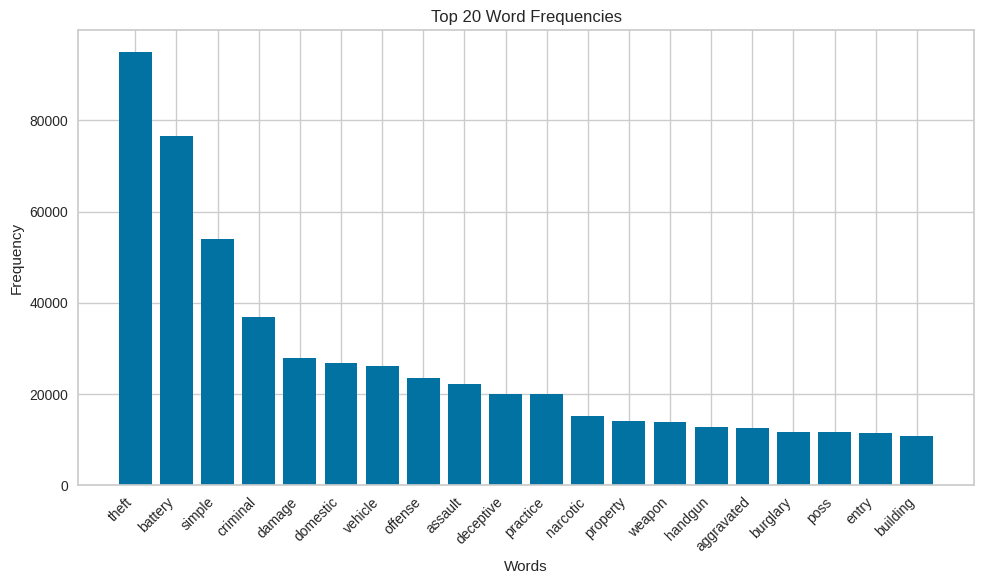

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'].head(20), word_freq_df['Frequency'].head(20))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a name="smotetfidf"></a>
### Aplicação do Smote e TF-IDF

Aplicando tambem o filtro Smote (Synthetic Minority Over-sampling Technique).



In [ ]:
X_smote = pd.DataFrame(cc_stopwords['with_stopwords'])
le = LabelEncoder()
X_smote['Text Combined'] = le.fit_transform(cc_stopwords['with_stopwords'])

smote = SMOTE(random_state=42)

# Define y_smote for SMOTE to work
y_smote = cc['Arrest']

X_resampled, y_resampled = smote.fit_resample(X_smote[['Text Combined']], y_smote)

# Reshape X_resampled to 1-dimensional (if needed)
X_resampled = X_resampled['Text Combined'].values.ravel()

cc_smoted = pd.DataFrame({'Text Combined': X_resampled, 'Arrest': y_resampled})
cc_smoted

,Text Combined,Arrest
0,88,0
1,113,1
2,13,0
3,277,0
4,116,0
...,...,...
430313,187,1
430314,365,1
430315,13,1
430316,85,1


#### TF - IDF

In [ ]:
X = cc_stopwords['with_stopwords']

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(cc_stopwords['with_stopwords'])

print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.toarray())

['10' '10 gm' '10 gram' ... 'wintent deliver' 'wvin' 'zone']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<a name="treinoteste"></a>
### Treino & Teste

Iremos testar o fitro Smote e o pré-processamento TF-IDF

In [ ]:
# Smote
features_smote = cc_smoted['Text Combined']

# TF-IDF
X_tfidf

<269053x1130 sparse matrix of type '<class 'numpy.float64'>'
	with 1359272 stored elements in Compressed Sparse Row format>

Separar em treino e teste.

In [ ]:
# Target
y = cc['Arrest']
SEED = 42

# Smote
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(features_smote, cc_smoted['Arrest'], test_size=0.2, shuffle=True, random_state=42, stratify=cc_smoted['Arrest'])

# TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

<a name="gaussiannb"></a>
### GaussianNB

In [ ]:
classifier_Gau = GaussianNB()

classifier_Gau.fit(X_train_tfidf.toarray(), y_train_tfidf)
y_pred_Gau_tfidf = classifier_Gau.predict(X_test_tfidf.toarray())

classifier_Gau.fit(X_train_st.values.reshape(-1, 1), y_train_st)
y_pred_Gau_st = classifier_Gau.predict(X_test_st.values.reshape(-1, 1))

In [ ]:
print('Classification Reports: ')

print(classification_report(y_test_st, y_pred_Gau_st))

print(classification_report(y_test_tfidf, y_pred_Gau_tfidf))


# 0 - Não foi preso; 1 - Foi preso.

Classification Reports: 
              precision    recall  f1-score   support

           0       0.57      0.62      0.60     43032
           1       0.59      0.53      0.56     43032

    accuracy                           0.58     86064
   macro avg       0.58      0.58      0.58     86064
weighted avg       0.58      0.58      0.58     86064

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43032
           1       0.89      0.47      0.61     10779

    accuracy                           0.88     53811
   macro avg       0.88      0.73      0.77     53811
weighted avg       0.88      0.88      0.87     53811



<a name="adaboost"></a>
### AdaBoostClassifier

In [ ]:
classifier_Ada = AdaBoostClassifier(n_estimators=180, learning_rate = 0.8)

classifier_Ada.fit(X_train_st.values.reshape(-1, 1), y_train_st)
y_pred_Ada_st = classifier_Ada.predict(X_test_st.values.reshape(-1, 1))

classifier_Ada.fit(X_train_tfidf, y_train_tfidf)
y_pred_Ada_tfidf = classifier_Ada.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test_st, y_pred_Ada_st))
print(classification_report(y_test_tfidf, y_pred_Ada_tfidf))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     43032
           1       0.78      0.78      0.78     43032

    accuracy                           0.78     86064
   macro avg       0.78      0.78      0.78     86064
weighted avg       0.78      0.78      0.78     86064

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.51      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.75      0.79     53811
weighted avg       0.89      0.89      0.88     53811



<a name="randomforest"></a>
### Random Forest

In [ ]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_st.values.reshape(-1, 1), y_train_st)
y_pred_rf_st = rf_classifier.predict(X_test_st.values.reshape(-1, 1))

rf_classifier.fit(X_train_tfidf, y_train_tfidf)
y_pred_rf_tfidf = rf_classifier.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test_st, y_pred_rf_st))
print(classification_report(y_test_tfidf, y_pred_rf_tfidf))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     43032
           1       0.81      0.78      0.79     43032

    accuracy                           0.80     86064
   macro avg       0.80      0.80      0.80     86064
weighted avg       0.80      0.80      0.80     86064

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.50      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.74      0.79     53811
weighted avg       0.89      0.89      0.88     53811



<a name="arvorededecisao"></a>
### Árvore de decisão (Decision Tree)

In [ ]:
dt_classifier_smote = DecisionTreeClassifier()

dt_classifier_smote.fit(X_train_st.values.reshape(-1, 1), y_train_st)
y_pred_dt_smote = dt_classifier_smote.predict(X_test_st.values.reshape(-1, 1))

dt_classifier_tfidf = DecisionTreeClassifier()

dt_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_dt_tfidf = dt_classifier_tfidf.predict(X_test_tfidf)

print("Decision Tree Classifier - SMOTE:")
print(classification_report(y_test_st, y_pred_dt_smote))

print("\nDecision Tree Classifier - TF-IDF:")
print(classification_report(y_test_tfidf, y_pred_dt_tfidf))

Decision Tree Classifier - SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     43032
           1       0.81      0.78      0.79     43032

    accuracy                           0.80     86064
   macro avg       0.80      0.80      0.80     86064
weighted avg       0.80      0.80      0.80     86064


Decision Tree Classifier - TF-IDF:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.50      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.74      0.79     53811
weighted avg       0.89      0.89      0.88     53811



<a name="svm"></a>
### Máquina de vetores de suporte (Support Vector Machine)

In [ ]:
SVM = SVC(kernel='linear', C=0.1, probability=False, random_state=42)
SVM.fit(X_train_tfidf, y_train_tfidf)
y_pred_SVM = SVM.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test_tfidf, y_pred_SVM, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.51      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.75      0.79     53811
weighted avg       0.89      0.89      0.88     53811



<a name="redeneuralartificial"></a>
### Rede neural artificial

In [ ]:
nn_params = {'hidden_layer_sizes':[(50,),(100,),(200,)], 'activation':['relu'], 'alpha':[0.0001,0.001,0.01]}
nn = MLPRegressor()
grid_search = GridSearchCV(nn, nn_params)
grid_search.fit(X_train_tfidf, y_train_tfidf)
print(grid_search.best_estimator_)
y_pred_grid_tfidf = grid_search.predict(X_test_tfidf)
print('Resultado Neural Network')
print('R2:', str(round(r2_score(y_test_tfidf, y_pred_grid_tfidf)*100,2))+'%')
print('MSE:', mean_squared_error(y_test_tfidf, y_pred_grid_tfidf))
print('MAE:', mean_absolute_error(y_test_tfidf, y_pred_grid_tfidf))

MLPRegressor(hidden_layer_sizes=(50,))
Resultado Neural Network
R2: 46.32%
MSE: 0.08598923756365688
MAE: 0.17415510024086192


<a name="pycaret"></a>
### PyCaret

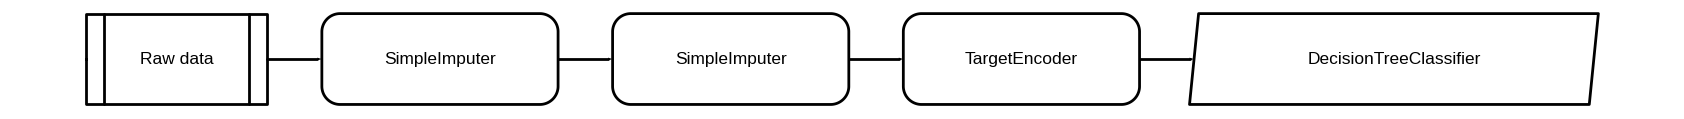

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')


In [ ]:
# Carregar o conjunto de dados
df = X.to_frame()
y = cc['Arrest']

# Configurar o ambiente de PyCaret
clf_setup = setup(data=df, target=y, session_id=42)

# Comparar todos os modelos disponíveis e selecionar o melhor
best_model = compare_models()

# Ajustar hiperparâmetros do melhor modelo
tuned_model = tune_model(best_model)

# Avaliar o modelo ajustado
evaluate_model(tuned_model)

# Exibir o melhor modelo
print(best_model)


Validando Decisão do PyCaret

In [ ]:
dt_classifier_tfidf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

dt_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_dtPyCaret_tfidf = dt_classifier_tfidf.predict(X_test_tfidf)

print("\nDecision Tree Classifier - TF-IDF:")
print(classification_report(y_test_tfidf, y_pred_dtPyCaret_tfidf))



Decision Tree Classifier - TF-IDF:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.50      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.74      0.79     53811
weighted avg       0.89      0.89      0.88     53811



<a name="resultados"></a>
## Resultados
<small>[Voltar ao topo](#apresentacao)</small>

Comparação dos classificadores.

In [ ]:
classifiers = {
    'GaussianNB': (y_test_tfidf, y_pred_Gau_tfidf),
    'AdaBoostClassifier': (y_test_tfidf, y_pred_Ada_tfidf),
    'RandomForestClassifier': (y_test_tfidf, y_pred_rf_tfidf),
    'DecisionTreeClassifier': (y_test_tfidf, y_pred_dt_tfidf),
    'Máquina de vetores de suporte (SVM)': (y_test_tfidf, y_pred_SVM),
    'DecisionTreeClassifier PyCaret': (y_test_tfidf, y_pred_dtPyCaret_tfidf)
}

comparison = {}
for clf_name, (y_true, y_pred) in classifiers.items():
  comparison[clf_name] = classification_report(y_true, y_pred, output_dict=True)

for clf_name, report in comparison.items():
  print(f"Classification Report for {clf_name}:")
  print(classification_report(classifiers[clf_name][0], classifiers[clf_name][1]))
  print("-" * 55)

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43032
           1       0.89      0.47      0.61     10779

    accuracy                           0.88     53811
   macro avg       0.88      0.73      0.77     53811
weighted avg       0.88      0.88      0.87     53811

-------------------------------------------------------
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43032
           1       0.90      0.51      0.65     10779

    accuracy                           0.89     53811
   macro avg       0.89      0.75      0.79     53811
weighted avg       0.89      0.89      0.88     53811

-------------------------------------------------------
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93  

<a name="matrizconfusao"></a>
### Matriz de Confusão *texto em itálico*


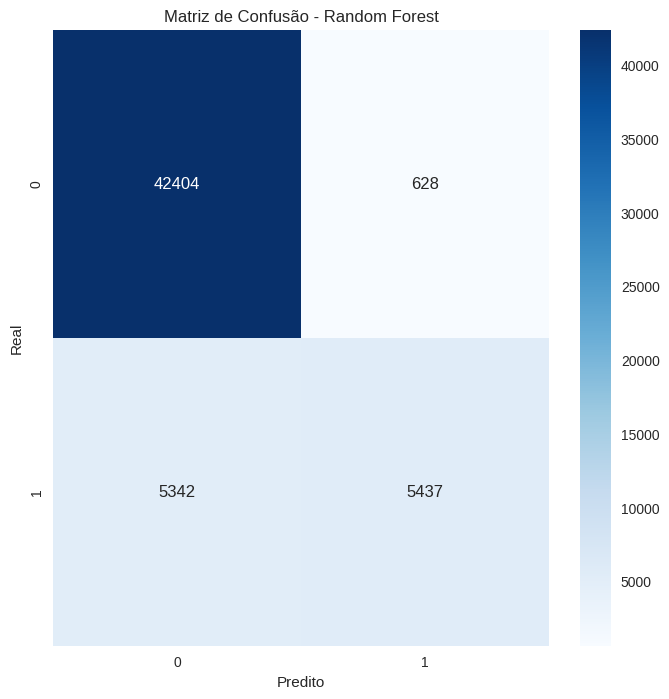

In [ ]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test_tfidf, y_pred_dtPyCaret_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

<a name="curvaaprendizado"></a>
### Curva de Aprendizado


Train Score: 0.8903095120840728
Test Score: 0.8890561409377264


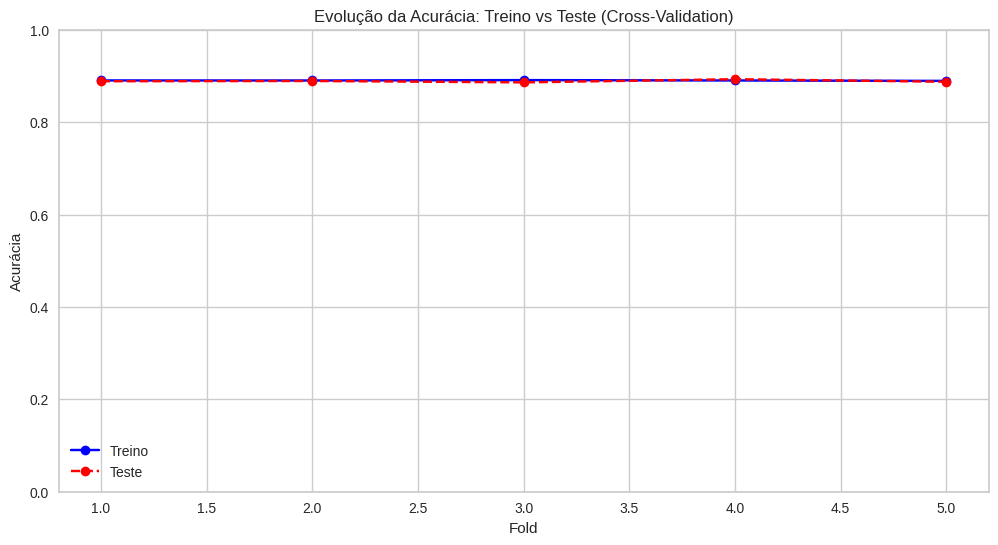

In [ ]:
# Detecção de Overfitting
train_score = dt_classifier_tfidf.score(X_train_tfidf, y_train_tfidf)
test_score = dt_classifier_tfidf.score(X_test_tfidf, y_test_tfidf)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
if train_score - test_score > 0.1:
    print("Warning: Possível overfitting detectado!")

# Visualização da Acurácia Real: Evolução Treino vs Teste
import matplotlib.pyplot as plt

# Registrando as acurácias de treino e teste durante a validação cruzada
from sklearn.model_selection import cross_val_score

# Cálculo das acurácias para cada fold
train_accuracies = cross_val_score(dt_classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=5)
test_accuracies = cross_val_score(dt_classifier_tfidf, X_test_tfidf, y_test_tfidf, cv=5)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), train_accuracies, marker='o', linestyle='-', color='blue', label='Treino')
plt.plot(range(1, 6), test_accuracies, marker='o', linestyle='--', color='red', label='Teste')
plt.title('Evolução da Acurácia: Treino vs Teste (Cross-Validation)')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()